# Transform Domain and Linear Filters

---

In this practical work, we study some tools to analyze images in the space-frequency domain. We analyze the spectral content of different images and see the effects of aliasing and experiment with filtering in the frequency domain.

## 1 Lab configuration

First of all, we will make sure to install the requeried toolboxes for this excercise (you may need to re-start the runtime after this step):

In [ ]:
!pip install --upgrade numpy scikit-image pillow plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 64.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 104.6 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.18.3
    Uninstalling scikit-image-0.18.3:
      Successfully uninstalled scikit-image-0.18.3


It may be useful to have an efficient way to transfer data from your google drive to colaboratory. This can be done by mounting your google drive in the colaboratory environment. Use your own image (grayscale) and the provided `test1.bmp`:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!wget "https://drive.google.com/uc?id=1eycfbbHEODVwvw0ZTNOC86W9SluaC-Lt" -O "test1.bmp"

--2023-02-23 09:25:45--  https://drive.google.com/uc?id=1eycfbbHEODVwvw0ZTNOC86W9SluaC-Lt
Resolving drive.google.com (drive.google.com)... 172.217.194.139, 172.217.194.100, 172.217.194.102, ...
Connecting to drive.google.com (drive.google.com)|172.217.194.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/o6inmb26t4ue2adsoj0g2f014ag0iq5l/1677144300000/01169085275889637052/*/1eycfbbHEODVwvw0ZTNOC86W9SluaC-Lt?uuid=2b37bd79-9b69-4726-a640-dd3ffd8acd77 [following]
--2023-02-23 09:25:46--  https://doc-04-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/o6inmb26t4ue2adsoj0g2f014ag0iq5l/1677144300000/01169085275889637052/*/1eycfbbHEODVwvw0ZTNOC86W9SluaC-Lt?uuid=2b37bd79-9b69-4726-a640-dd3ffd8acd77
Resolving doc-04-64-docs.googleusercontent.com (doc-04-64-docs.googleusercontent.com)... 74.125.68.132, 2404:6800:4003:c02::84
Connecting to doc

Display the images to check they have been uploaded correctly. Please change the name of the file you uploaded in the previous section.

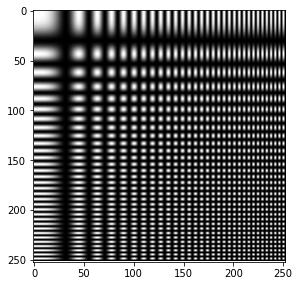

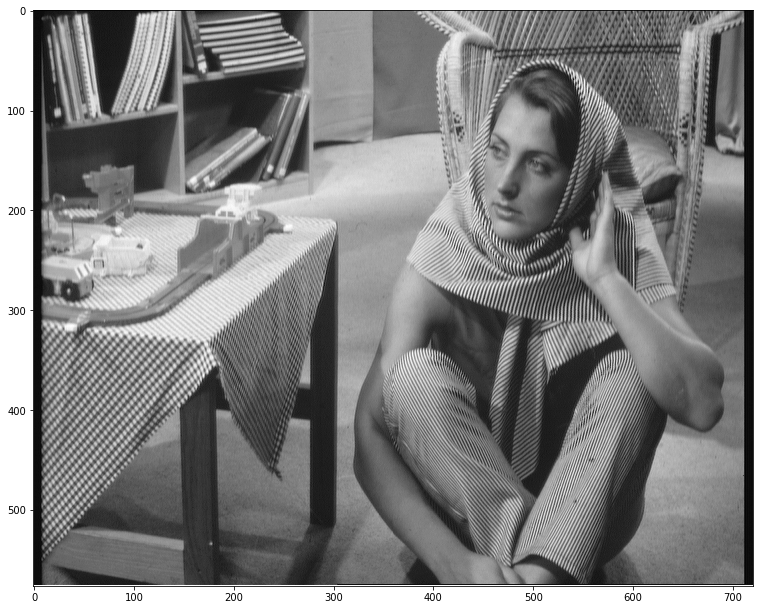

In [ ]:
from skimage import io as skio
from skimage import transform as sktf
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import image as mpimg


# Read the files from notebook disk
test1 = skio.imread('test1.bmp')
img = skio.imread('barbara_gray.bmp',as_gray=True)

def display_image(img, title='', size=None):
  #plt.subplot(1,2,1)
  plt.gray()
  h = plt.imshow(img, interpolation='none')
  if size:
    dpi = h.figure.get_dpi()/size
    h.figure.set_figwidth(img.shape[1] / dpi)
    h.figure.set_figheight(img.shape[0] / dpi)
    h.figure.canvas.manager.resize(img.shape[1] + 1, img.shape[0] + 1)
    h.axes.set_position([0, 0, 1, 1])
    h.axes.set_xlim(-1, img.shape[1])
    h.axes.set_ylim(img.shape[0], -1)
  plt.grid(False)
  plt.title(title)  
  plt.show()

def display_ft(ft, title='', centered=True):
  N = ft.shape[0]
  if centered:
    x = np.linspace(-0.5, 0.5, N)
    y = np.linspace(-0.5, 0.5, N)
  else:
    x = np.linspace(0, 1.0, N)
    y = np.linspace(0, 1.0, N)
  X, Y = np.meshgrid(x, y)
  fig = go.Figure(data=[go.Surface(z=ft,x=X,y=Y)])
  fig.update_layout(title=title)
  fig.update_layout(scene = dict(xaxis_title='Fx', yaxis_title='Fy', zaxis_title='FT'))
  fig.show()

def display_dft(ft, title=''):
  fig = go.Figure(data=[go.Surface(z=ft)])
  fig.update_layout(title=title)
  fig.update_layout(scene = dict(xaxis_title='k', yaxis_title='l', zaxis_title='DFT'))
  fig.show()

display_image(test1, size=1)
display_image(img, size=1)

## 2	Discrete Fourier Transform (DFT) and its representation


---


Now we'll display the transforms of these images. We'll benefit from the case-sensitive of python to name the transform in capital letters. First, we compute the transform:


In [ ]:
IMG = np.fft.fft2(img)


Then, we display its modulus. We need to display the values in a logarithmic scale (you can try what would happen if we use the linear scale, i.e. without the log):

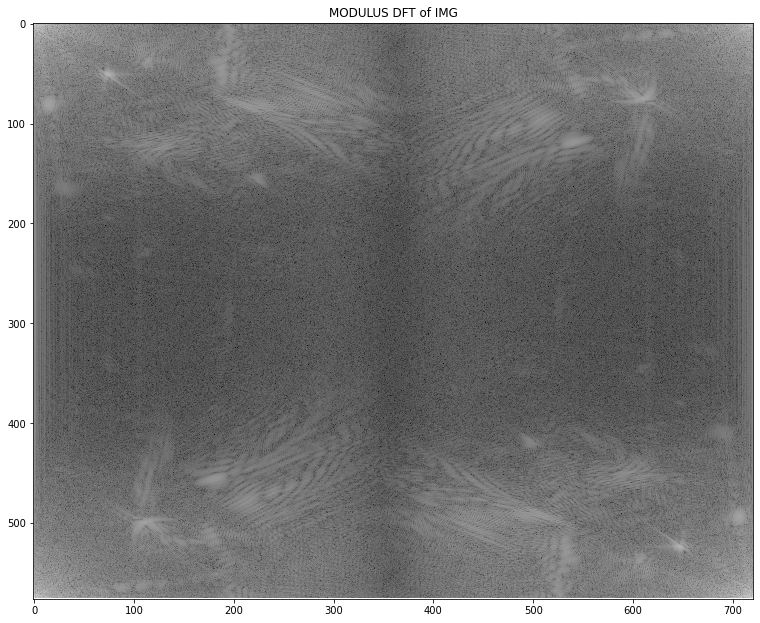

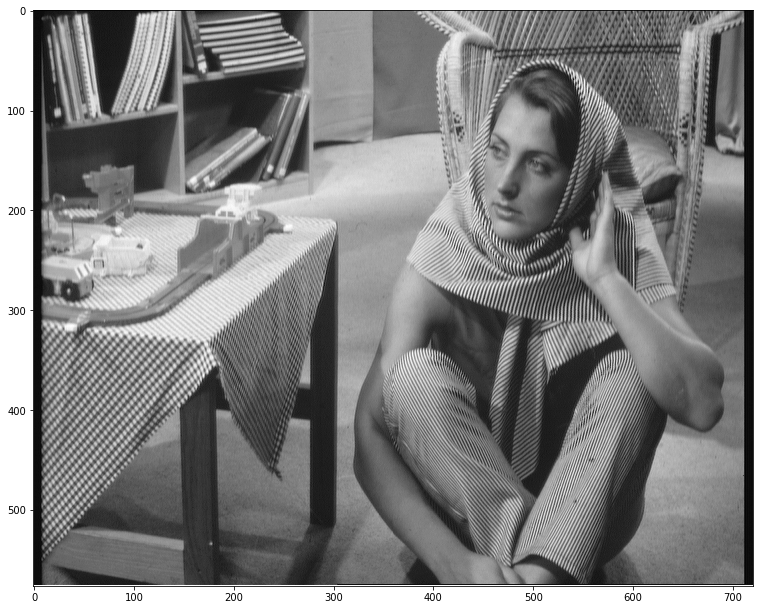

In [ ]:
display_image(np.log(1+np.abs(IMG)), title='MODULUS DFT of IMG', size=1)
display_image(img, size=1)

The DC component in the transform domain of IMG is located in the top left corner of the display. Remember that the spectrum of a discrete signal is $2\pi$-periodic. The DFT represents with N samples (if N is the length of the transform) one period of the spectrum. In 2D, the transform image has period $NxN$. In fact, the transform matrix IMG that we have computed presents only the samples of the fundamental period from $[0,2\pi) x [0,2\pi)$.

To visualize image transforms, we use to display the DC component in the center of the picture. In this way, it is easier to see the conjugate symmetry of the transform of a real signal. We use the function fftshift() to do this: 

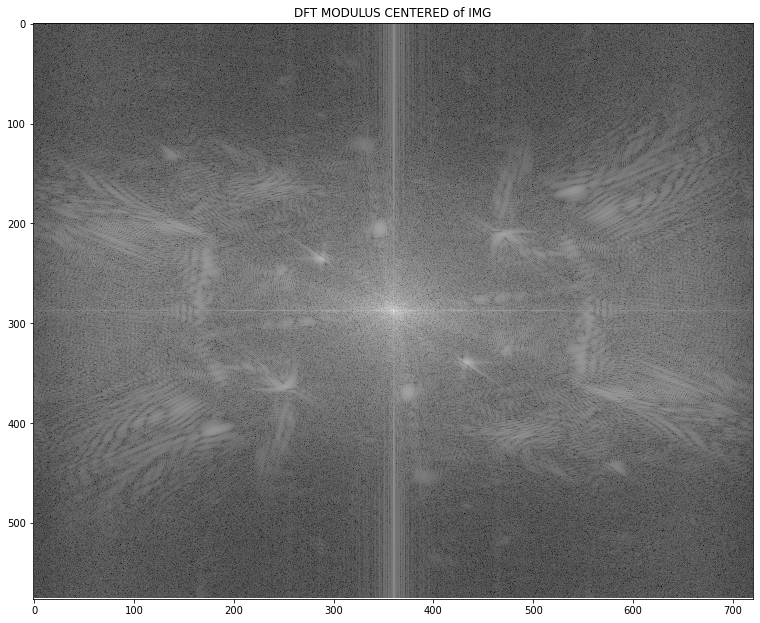

In [ ]:
IMG_mod=np.fft.fftshift(np.log(1+np.abs(IMG)))
display_image(IMG_mod, title='DFT MODULUS CENTERED of IMG', size=1)

<font color='purple'>Try to relate details observed in the image spectra with the original content.</font>

---
<font color='red'>Answer: 
Els eixos representen mostres, no freqüències.
Es veu una gran energia en les freqüències 1/2 1/2 en el mòdul de la dft. Això ens indica que els canvis d'energia en la imatges estaran en direcció diagonal i que seran força ràpids. Per tant, podem deduïr per exemple que aquell punt que apareix en aquestes freqüències del mòdul representa els canvis de valors dels píxils del mantell de la taula.
(per teoria: la creu dels contorns de la dft centrada es veuen així ja que la imatge està enfinestrada).
</font> 

Now, you can follow the same process for `test1` image to generate the modulus of its transform. Write the necessary  commands. As before, use capital letters to name the transform: `TEST1` and `TEST1_mod`. As can be seen, the `test1` image is a low pass signal. 

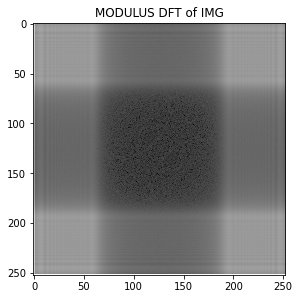

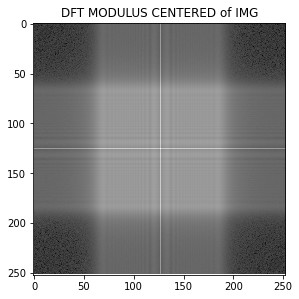

In [ ]:
# Display test1 DFT
TEST1 = np.fft.fft2(test1)
display_image(np.log(1+np.abs(TEST1)), title='MODULUS DFT of IMG', size=1)
TEST1_mod=np.fft.fftshift(np.log(1+np.abs(TEST1)))
display_image(TEST1_mod, title='DFT MODULUS CENTERED of IMG', size=1)


<font color='purple'>Estimate the horizontal and the vertical bandwidth of the image (give your answer with normalized frequencies).</font>

---
<font color='red'>Answer: 
Fixant-nos en la segona imatge (el mòdul de la dft centrada) veiem clarament que l'ample de banda és 1/2 ja que els canvis d'energia importants es donen en les freqüències -1/4 i 1/4 tan horitzontal com verticalment. 
També podríem mirar-ho per definició, saben que l'ample de banda és el doble que la freqüència de tall (definint al freqüència de tall com a 1/4) 
</font>  


## 3 Down sampling and aliasing


---

Nyquist theorem establishes that we should limit the bandwidth of a given signal before sampling (or downsampling) to half the new sampling frequency. Otherwise, aliasing might occur. In this section, we are going to downsample images without filtering, and see what happens in the resulting spectra. We are going to use the function [resize](http://scikit-image.org/docs/stable/api/skimage.transform.html#resize) from the skimage toolbox. To downsample an image by a factor 3, you can use it as follows. You can use the parameter `size` to zoom the figure without doing any upsampling.

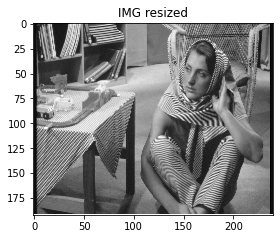

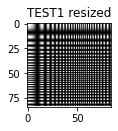

In [21]:
from skimage import transform

img_sub = transform.resize(img,np.asarray(img.shape)/3, anti_aliasing=False, mode='constant');
display_image(img_sub,title='IMG resized', size=1)

test1_sub=transform.resize(test1,np.asarray(test1.shape)/3, anti_aliasing=False, mode='constant');
display_image(test1_sub, title='TEST1 resized', size=1)



<font color='purple'>Can you interpret the results? Is there any special effect? Try to explain the effect you see when displaying the downsampled version of `test1`.</font>

---
<font color='red'>Answer: 
Es veu molt clara la pèrdua de qualitat de la imatge, la qual cosa és normal degut a que estem reduïnt el nombre de mostres (i en conseqüència el detall). Per posar un exemple, es veu molt clar com s'han perdut els plecs de la roba del genoll i mocador de la Barbara, o fins i tot els quadradets del mantell estan molt menys definits.

L'efecte que provoca el downsampling de la imatge test1 és una sensació de profunditat capa al punt de les mostres (50,50) aproximàdament.
</font>


Let's see the spectra of these images before and after the downsampling:

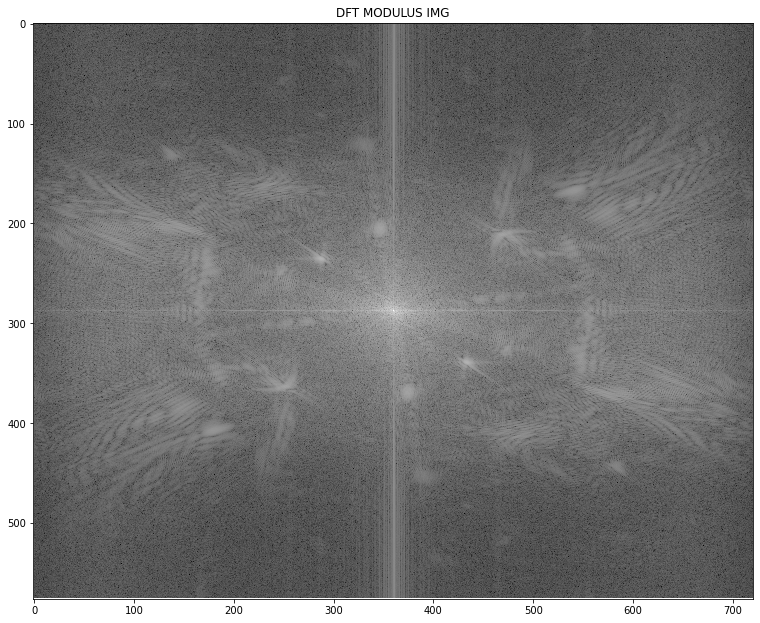

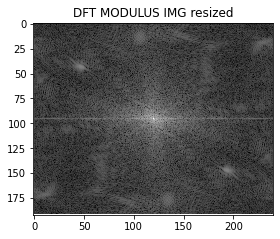

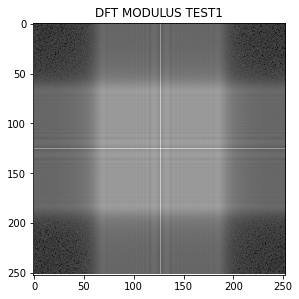

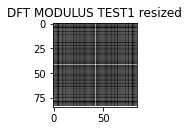

In [22]:
IMG_sub_mod = np.fft.fftshift(np.log(1+np.abs(np.fft.fft2(img_sub))))
display_image(IMG_mod, title='DFT MODULUS IMG', size=1)
display_image(IMG_sub_mod, title='DFT MODULUS IMG resized', size=1)

TEST1_mod = np.fft.fftshift(np.log(1+np.abs(np.fft.fft2(test1)))) # DELETE
TEST1_sub_mod = np.fft.fftshift(np.log(1+np.abs(np.fft.fft2(test1_sub))))
display_image(TEST1_mod, title='DFT MODULUS TEST1', size=1)
display_image(TEST1_sub_mod, title='DFT MODULUS TEST1 resized', size=1)

Actually, the transforms being visualized show only one period of the spectrum of the images after downsampling. We are going to manipulate the transform matrices in order to display, side by side, several spectral replicas of the spectrum to show the periodicity effect. This will give a more precise idea of what is going on with the downsampling:

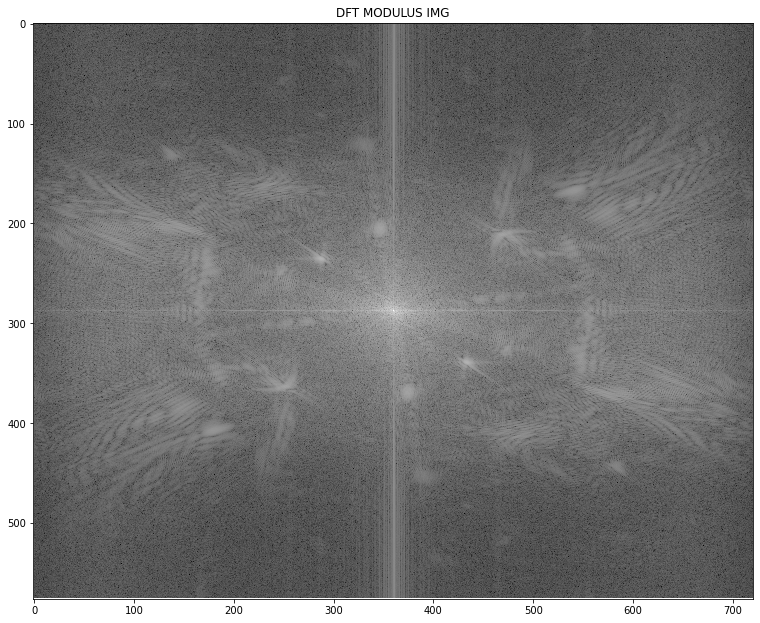

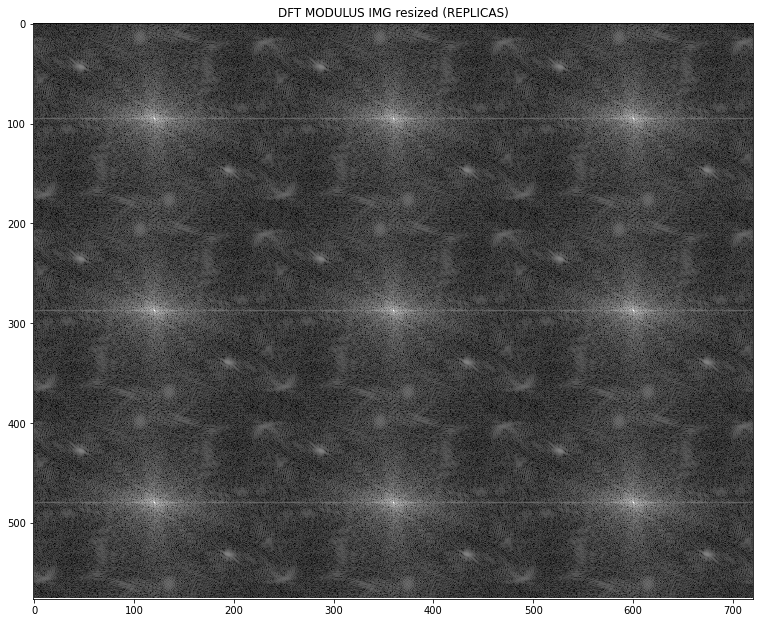

In [23]:
display_image(IMG_mod, title='DFT MODULUS IMG', size=1)
tmp = np.hstack((IMG_sub_mod,IMG_sub_mod,IMG_sub_mod))
IMG_sub_mod_replicas = np.vstack((tmp,tmp,tmp))
display_image(IMG_sub_mod_replicas,title='DFT MODULUS IMG resized (REPLICAS)',size=1)

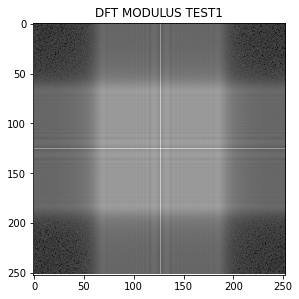

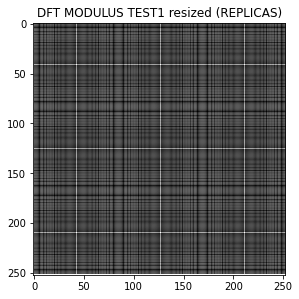

In [24]:
display_image(TEST1_mod, title='DFT MODULUS TEST1', size=1)
tmp = np.hstack((TEST1_sub_mod,TEST1_sub_mod,TEST1_sub_mod))
TEST1_sub_mod_replicas = np.vstack((tmp,tmp,tmp))
display_image(TEST1_sub_mod_replicas,title='DFT MODULUS TEST1 resized (REPLICAS)',size=1)


<font color='purple'>As we have not filtered before downsampling, could you tell in which range of frequencies
(in normalized frequency units $f_x, f_y$) of the transform image in the `TEST1` case, we
have no aliasing effect? (assume that the `TEST1` image only contains frequency components
below the frequency you have estimated at the end of section 1 and theoretically estimate
the alias free band).

Please note that when we resize figures resulting from function display_image(), there are implicit processes of downsampling and interpolation. Please use the parameter `size` of the function with caution. For instance, the effect of disappearing lines in the display of the spectrum of `TEST1_sub` when `size` is different than 1 is due to this downsampling.</font>

---
<font color='red'>Answer: 

</font> 

#### Downsampling experiment

Let's experiment with the downsampling of a second image `test2`. We will generate the image `test2` as a numpy matrix by using an inverse 2D DFT transform, as follows:

In [ ]:
# create a 128x128 matrix of zeros
X = np.zeros((128,128))

# set coefficient value in 16th row, 48th column (starting with 0)
X[16,48] = 128*128

# compute the real part of the inverse 2D-DFT
test2 = np.real(np.fft.ifft2(X)); 

# shifts test2 to avoid negative values
test2 = test2 + 1;
display_image(test2, title='test2', size=1)


As a reminder, direct and inverse Discrete Fourier Transforms (DFT) of an image (2D
signal) are defined as follows:

$$X[k,l] = \sum^{M-1}_{m=0}\sum^{N-1}_{n=0}x[m,n]e^{-j2\pi \left( \frac{mk}{M}+\frac{nl}{N}\right) }$$ with $0 \leq k < M-1$ and $0 \leq  l < N-1$

$$x[m,n] = \frac{1}{MN}\sum^{k=0}_ {M-1}\sum^{l=0}_ {N-1}X[k,l]e^{j2\pi\left( \frac{mk}{M} + \frac{nl}{N}  \right)}$$


To be consistent with the scikt notation, we will assume that m indicates rows (vertical
index) and n indicates columns (horizontal index). Therefore, k will be the index for the
normalized vertical frequency, and l for the horizontal frequency. Note that the DC coefficient corresponds to the $X[0,0]$ position of and the component with $(f_x ,f_y)=(16/128,48/128)$ corresponds to $X[16,48]$. 

Considering that we have just computed the real part of the inverse transform of a $128x128$ spectrum with a single non-zero value (actually, a spectrum with one delta), could you obtain the expressions requested below?


<font color='purple'>1) The analytic expression of the transform $X[k, l]$ we have just created as a function of
the 2D Kronecker delta in the transform domain (remember $\delta[k, l] = \delta[k] \cdot \delta[l]$)</font>

---
<font color='red'>Answer: 

</font>

<font color='purple'>2) The result of the inverse 2D DFT transform $x[m,n]=DFT^{-1}\left\{X[k, l]\right\}$ as an exponential
function in $[m,n]$.</font>

---
<font color='red'>Answer: 

</font>


<font color='purple'>3) A closed expression for the image $test2[m,n]=REAL\left\{x[m,n]\right\}+1$</font>

---
<font color='red'>Answer: 

</font>

We now downsample the resulting image by a factor 2 and show both the original `test2` image and the resized version `test2_sub`:

In [ ]:
display_image(test2, title='test2', size=1)
test2_sub = sktf.resize(test2,np.asarray(test2.shape)/2, anti_aliasing=False, mode='constant');
display_image(test2_sub, title='test2 resized', size=1)


<font color='purple'>Compare the original `test2` and the downsampled `test2_sub` image, do you see any special effect?
Describe how the frequency of the 2D sinusoid has apparently changed with the downsampling.</font>

---
<font color='red'>Answer: 

</font> 

Now display the transform of the two images to better understand what happened:

In [ ]:
TEST2_mod=np.fft.fftshift(np.log(1+np.abs(np.fft.fft2(test2-1))))
TEST2_sub_mod=np.fft.fftshift(np.log(1+np.abs(np.fft.fft2(test2_sub-1))))
display_image(TEST2_mod,title='DFT MODULUS TEST2',size=1)
display_image(TEST2_sub_mod, title='DFT MODULUS TEST2 resized', size=1)

<font color='purple'>Compare the replicated spectrum of the downsampled image with the original spectrum of `test2`. Explain now more precisely the aliasing effect described in your previous answer? In particular can you compute exactly the frequency components appearing in the image after downsampling?</font>

---
<font color='red'>Answer: 

</font>


In the next section, we are going to filter the image before downsampling in order to get a
better result.

## 4 Linear Filters

The direct way to filter an image is to convolve it with an impulse response. Let us
experiment with the `img` image and a gaussian impulse response:

In [ ]:
from skimage import filters

sigma = 1
window = 5
truncate = (((window - 1)/2)-0.5)/sigma
img_filt = filters.gaussian(img,sigma=sigma,truncate=truncate);
display_image(img,title='img (original)', size=1)
display_image(img_filt, title='img (filtered)', size=1)


<font color='purple'>Paste the image and describe the effects of this filter and relate these effects with the theoretical properties of the filter.</font>

---
<font color='red'>Answer: 

</font>

Another way to filter an image is to simply remove some transform coefficients corresponding to the frequency components to remove. However, this "Frequency Filtering" technique by means of a frequency mask is not always adequate. Let us explore
this issue.

## 5 Frequency filtering

Assume we apply a low pass filter to avoid aliasing problems when downsampling `test1`:

In [ ]:
display_image(test1,title='test1',size=1)
display_image(test1_sub, title='test1 resized', size=1)


We could have removed all frequency components above half the new sampling frequency before downsampling by using a frequency mask as done in the following:


In [ ]:
TEST1 = np.fft.fft2(test1)
TEST1_mod = np.fft.fftshift(np.log(1+np.abs(TEST1)))
fils = TEST1.shape[0]
cols = TEST1.shape[1]

print(cols/6)
# mask vertical frequencies
TEST1[int(1/6*fils):int(5/6*fils)+1,:] = 0;

# mask horizontal frequencies
TEST1[:,int(1/6*cols):int(5/6*cols)+1] = 0;

display_image(TEST1_mod, title='DFT MODULUS TEST1', size=1)
display_image(np.fft.fftshift(np.log(1+np.abs(TEST1))), title='DFT MODULUS TEST1 filtered', size=1)


To see the resulting image, we need to apply the inverse FFT transform:

In [ ]:
test1_filt = 9*np.real(np.fft.ifft2(TEST1))
display_image(test1, title='test1', size=1)
display_image(test1_filt, title='test1 (filtered)', size=1)

Now compare what happens when downsampling this result with the previous case:

In [ ]:
test1_sub  = transform.resize(test1,     np.asarray(test1.shape)/3,      anti_aliasing=False, mode='constant');
test1_sub2 = transform.resize(test1_filt,np.asarray(test1_filt.shape)/3, anti_aliasing=False, mode='constant');

display_image(test1_sub,title='test1 downsampled (no filter)', size=1)
display_image(test1_sub2,title='test1 downsampled (filtered)', size=1)


As you can see, aliasing is not present but, of course, the highest frequencies have been
removed by the low pass filter. However, this filtering technique may not always be
adequate. Let's apply the same technique to the IMG image. Then we filter it as we previously have done with test2:

In [ ]:
IMG = np.fft.fft2(img)
IMG_mod = np.fft.fftshift(np.log(1+abs(IMG)))
fils = IMG.shape[0]
cols = IMG.shape[1]
# mask vertical frequencies
IMG[int(1/6*fils):int(5/6*fils)+1,:] = 0
# mask horizontalal frequencies
IMG[:,int(1/6*cols):int(5/6*cols)+1] = 0

display_image(IMG_mod, title='DFT MODULUS IMG', size=1)
display_image(np.fft.fftshift(np.log(1+np.abs(IMG))), title='DFT MODULUS IMG (filtered)', size=1)

Let's see now the result of the inverse transform:


In [ ]:
img_filt = 9*np.real(np.fft.ifft2(IMG));
display_image(img, title='img', size=1)
display_image(img_filt, title='img (filtered)', size=1)

<font color='purple'>Maximize the window to better see the result. Can you explain this effect?</font>

---
<font color='red'>Answer: 

</font>

## 6 Removal of a sinusoidal interference

We can use notch filters to remove some kinds of interference. Imagine that the `img` image has been corrupted by a sinusoidal interference as follows. First, we generate the interferring signal. We follow the same process than in section
"Transform Domain":


In [ ]:
# resize img to a 252x252 image
img2 = transform.resize(img,(252,252), anti_aliasing=True, mode='constant');

# create a 252x252 matrix of zeros
INTERF = np.zeros(img2.shape)

# set some energy at coefficient X(16,48)
INTERF[16,48] = 4000

# same at the X(64,48)
INTERF[64,48] = 1000

# inverse transform to compute the interferring image
interf = np.real(np.fft.ifft2(INTERF)+1)

display_image(interf, title='interf', size=1)


And now we corrupt the `img2`  image by adding `interf`:



In [ ]:
img2_interf = interf + img2/np.amax(img2)
display_image(img2, title='img2', size=1)
display_image(img2_interf, title='img2_interf', size=1)

Let's see the spectrum of the corrupted image:


In [ ]:
IMG2_INTERF = np.fft.fft2(img2_interf);
display_image(np.fft.fftshift(np.log(1+np.abs(IMG2_INTERF))), title='DFT MODULUS IMG2_INTERF', size=1)

Can you appreciate the interferring coefficients? (play with the `size` parameter to help you see it)

<font color='purple'>Using the method of frequency filtering, try to remove the interference from the image `img2_interf`. You can use a "notch" filter to eliminate the interfering coefficients of high energy in the transform. Write the corresponding commands and explain the strategy you have followed:
</font>

---
<font color='red'>Answer: 

</font> 

In [ ]:
# Write below the commands you need

